# Piloted Nonpremixed Jet Flames

This Jupyter Notebook was written by Dan Haworth. It is intended as a tutorial to be used in parallel with Chapter 13 of the book "An Introduction to Combustion: Concepts and Applications" by Stephen R. Turns and Daniel C. Haworth. That book is referred to as "Turns 4th ed." throughout this Notebook.

This Notebook was last updated by Dan Haworth on 21 February 2020.

The principal objective of this tutorial is to illustrate the structure of a nonpremixed turbulent flame, by examining experimental data for a laboratory piloted nonpremixed turbulent jet flame. The flame structure in both physical space and mixture-fraction space is presented and discussed, and the experimental data are compared with results from two commonly used approximations or models: a local equilibrium model, and a "flamelet" model based on a counterflow laminar diffusion flame. The concept of a mixture fraction is extended to cases where the fuel is diluted with (in this case) air. We will use the thermodynamic properties, reaction mechanism, and transport properties that are included in gri30.cti.

The .csv files containing the experimental data (in Excel-compatible .csv format) must be placed in a folder or directory named "data" that is immediately below the folder or directory from which you have opened this Notebook. If you downloaded the .zip file that contains all of the tutorial Notebooks, the appropriate folder and file structure should be in place. The experimental data are discussed in Section 1 below.

The reader should be familiar with the material in the earlier chapter Notebooks before working through this Notebook.

## 1. Flame configuration

Here piloted nonpremixed turbulent jet flames are considered. This is essentially the configuration that is discussed through most of Chapter 13 of Turns 4th ed., but with two additional features: the "fuel" that issues from the fuel nozzle is actually a mixture of fuel and air (25% methane and 75% dry air, by volume), and there is an annular pilot flame surrounding the fuel nozzle. The pilot flame serves to stabilize the turbulent flame, and allows higher Reynolds numbers to be reached without flame liftoff or blowoff. The dilution of the fuel with air increases the stoichiometric value of the mixture fraction compared to that for a pure methane fuel, as will be explained shortly. While one might be tempted to consider this to be a premixed flame (since the fuel and the air issuing from the nozzle are premixed), in fact it behaves as a nonpremixed flame with diluted fuel. That will be evident in the experimental data that are presented and discussed below.

The flame configuration is one that has been targeted by the International Workshop on Measurement and Computation of Turbulent Nonpremixed Flames: the ["TNF Workshop"](https://www.sandia.gov/TNF/abstract.html). A flame image, description, documentation, and experimental data can be found at https://www.sandia.gov/TNF/DataArch/FlameD.html. There is a series of flames (denoted as Flames C-F) that differ primarily in the fuel jet flowrates, or Reynolds numbers. Here we will focus on "Flame D" and "Flame F". Flame D exhibits a modest level of local extinction, while Flame F is on the verge of global extinction (blowoff). This will be discussed further in Section 4 below. This series of flames (Flame D, in particular) has been used extensively to develop and validate computational-fluid-dynamics- (CFD-) based turbulent combustion models. A review of several of the modeling studies published up to 2010 for these flames, as well as other TNF Workshop flames, can be found in: D.C. Haworth (2010) "Progress in probability density function methods for turbulent reacting flows," Progress in Energy and Combustion Science, 36:168-259.

### 1.1 "Fuel" composition

First, it is important to understand what is meant by a mixture of "25% methane and 75% dry air, by volume". That means that 25% of the molecules issuing from the fuel jet are methane (CH4) molecules, and 75% of the molecules are air (either O2 or N2) molecules, where the ratio of N2 molecules to O2 molecules is 79/21 = 3.76. Therefore, the molar composition of the "fuel" here can be written as:

$$ Fuel = 0.25 CH_4 + 0.75 ( O_2 + 3.76 N_2 ) / 4.76 = 0.25 CH_4 + 0.157563 O_2 + 0.5924369 N_2 $$

where the coefficients are then the mole fractions of the three species in the "fuel".

### 1.2 Mixture-fraction definition

The definition of an appropriate mixture fraction also is important. As discussed in Chapter 7 of Turns 4th ed., the local value of the mixture fraction in the flame should correspond to the local mass fraction of material that originated in the fuel jet (with "fuel" interpreted as in Section 1.1 above), versus in the ambient air. And as discussed in tutorial Notebook 7_2_Mixture_fractions, mixture fractions can be defined in terms of elemental mass fractions.

Because the mixture that issues from the fuel jet here includes both methane and air, an appropriate definition in terms of elemental mass fractions is as follows. The local value of the mixture fraction $f$ at any point in the flame is defined in terms of the local elemental mass fractions of hydrogen and of carbon (denoted as $z_H$ and $z_C$, respectively), the values of the elemental mass fractions of hydrogen and carbon in the fuel jet ($z_{H,1}$ and $z_{C,1}$, respectively) and in the ambient air ($z_{H,2}$ and $z_{C,2}$, respectively, where $z_{H,2} = z_{C,2} = 0$), and the atomic weights of hydrogen and carbon atoms ($W_H$ and $W_C$, respectively) as:

$$ f \equiv \frac{ 0.5(z_H  -z_{H,2})/W_H + 2(z_C - z_{C,2})/W_C }{0.5(z_{H,1}-z_{H,2})/W_H + 2(z_{C,1}-z_{C,2})/W_C} $$

Here the multipliers of 0.5 for hydrogen and 2.0 for carbon correspond to the number of oxygen atoms needed to completely oxidize each atom of hydrogen or of carbon, with all hydrogen becoming $H_2O$ and all carbon becoming $CO_2$. This definition is consistent with the value of $f$ being equal to one in pure "fuel" (where $z_H = z_{H,1}$ and $z_C = z_{C,1}$) and to zero in ambient air (where $z_H = z_C = 0 $).

Also, recall from tutorial Notebook 7_2_Mixture_fractions that the local values of the equivalence ratio $ \Phi $ and the mixture fraction $f$ are related by:

$$ \Phi = \frac{f ( 1 - f_{stoich} )}{f_{stoich} ( 1-f) } $$

where $f_{stoich}$ is the stoichiometric value of the mixture fraction.

The stoichiomentric value of the mixture fraction can be determined as follows. We will do this calculation using Cantera:

In [1]:
# import modules
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# print Cantera version
print("Running Cantera version: {}".format(ct.__version__))

Running Cantera version: 2.4.0


In [2]:
# define an ideal-gas mixture using gri30.cti and Cantera's "Solution()" object
gas = ct.Solution('gri30.cti') 

In [3]:
# set the gas mixture state to correspond to the fuel jet
fuel    = 'CH4:0.25, O2:0.157563, N2:0.5924369'
gas.TPX = 300., ct.one_atm, fuel

# compute and print the elemental mass fractions of hydrogen and of carbon in the fuel jet
z_H1 = gas.elemental_mass_fraction('H')
z_C1 = gas.elemental_mass_fraction('C')

z_H1 , z_C1

(0.03929784271511716, 0.1170720451741354)

In [4]:
# set the gas mixture state to correspond to ambient air, making our usual approximation for air
air     = 'O2:1.0, N2:3.76'
gas.TPX = 300., ct.one_atm, air

# compute and print the elemental mass fractions of hydrogen and of carbon in ambient air
z_H2 = gas.elemental_mass_fraction('H')
z_C2 = gas.elemental_mass_fraction('C')

z_H2 , z_C2

(0.0, 0.0)

In [5]:
# set the gas mixture state to correspond to a stoichiometric mixture of fuel (25% CH4, 75% air) and ambient air
phi = 1.0

gas.set_equivalence_ratio(phi,fuel,air)

# compute and print the elemental mass fractions of hydrogen and of carbon in a stoichoimetric fuel-air mixture
z_Hst = gas.elemental_mass_fraction('H')
z_Cst = gas.elemental_mass_fraction('C')

z_Hst , z_Cst

(0.013869060822121602, 0.041317263312921036)

In [6]:
# compute and print the stoichiometric value of the mixture fraction
W_H = gas.atomic_weights[gas.element_index('H')]
W_C = gas.atomic_weights[gas.element_index('C')]

f_st = ( 0.5*(z_Hst-z_H2)/W_H + 2.0*(z_Cst-z_C2)/W_C ) / ( 0.5*(z_H1-z_H2)/W_H + 2.0*(z_C1-z_C2)/W_C )

f_st

0.3529216838354953

So, the stoichiometric value of the mixture fraction is approximately 0.353. This is much higher than the value for pure methane burning with air, and is close to the value of 0.351 that is given in the TNF Workshop documentation. 

From the results that follow, it should be evident that this is an appropriate mixture fraction definition and a reasonable value for the stoichiometric mixture fraction.

### 1.3 Experimental data and averaging

In the experiments, local instantaneous values of temperature and concentrations of several species (reported as species mass fractions) are measured simultaneously using laser-based diagnostics. The mixture fraction is then computed from the measured species compositions, using the formula given in Section 1.2 above. The measurements are performed at multiple spatial locations in the turbulent flame, and the measurements at each spatial location are repeated multiple times so that local time-averaged mean values can be computed. The configuration is statistically stationary (mean values are independent of time) and axisymmetric (mean values depend only on axial distance from the fuel nozzle exit, and on radial distance from the geometric centerline).

Two kinds of mean, or average, values are computed and reported: conventional averages, and Favre (density-weighted) averages. For a physical quantity $ Q = Q ( \underline x , t )$ (e.g., temperature or a species mass fraction), the *conventional average* at a fixed spatial location $ \underline x $ based on measurements made at $N$ different instants in time is defined as:

$$ < Q > = < Q ( \underline x ) > \equiv \frac{1}{N} \sum _ {i=1} ^ N Q_i (\underline x) $$

where $ Q_i (\underline x) = Q ( \underline x , t_i ) $ is the value on the $i$'th measurement. The *Favre average*, or *density-weighted average*, is defined as:

$$ \widetilde Q = \widetilde Q ( \underline x ) \equiv \frac{\frac{1}{N} \sum _ {i=1} ^ N \bigl( \rho_i ( \underline x) Q_i (\underline x) \bigr)}{\frac{1}{N} \sum _ {i=1} ^ N  \rho_i ( \underline x)} $$

where $ \rho _ i ( \underline x) = \rho ( \underline x , t_i ) $ is the local mixture mass density on the $i$'th measurement (determined from the measured local instantaneous temperature and species compositions, and the ideal-gas law, with the mixture pressure being equal to atmospheric pressure).

Root-mean-square (rms) quantitites are defined similarly. For a conventional average:

$$ Q_{rms} = Q_{rms} ( \underline x ) \equiv \sqrt{\frac{1}{N} \sum _ {i=1} ^ N \bigl( Q_i (\underline x) - < Q ( \underline x) > \bigr)^2} $$

and for a Favre average:

$$ Q_{F,rms} = Q_{F,rms} ( \underline x ) \equiv \sqrt{\frac{1}{N} \sum _ {i=1} ^ N \bigl( Q_i (\underline x) - \widetilde Q ( \underline x) \bigr)^2} $$

Favre-averaged quantities are often preferred in descriptions of turbulent flames, as the governing equations have a simpler form when written in terms of Favre averages than when written in terms of conventional averages.

Experimental data files containing both instantaneous and mean quantities (both conventional averages and Favre averages) at several spatial locations (different axial distances from the fuel-jet nozzle exit, and different radial distances from the geometric centerline) can be found at https://www.sandia.gov/TNF/DataArch/FlameD.html. Five of those files have been provided with this Notebook, in the form of .csv files. 

## 2. Profiles of mean and rms quantities

The flame structure in physical space is examined by plotting profiles of various mean and rms quantitites.

### 2.1 Centerline profiles

Here we look at axial profiles of Favre-averaged mean and rms quantitites along the geometric centerline of Flame D.

In [7]:
# read experimental data into a Pandas DataFrame
# the Excel file "FlameD_Yfav_CL.csv" must be in subdirectory "data" under the current working directory
FlameD_CL = pd.read_csv('data/FlameD_Yfav_CL.csv')

# print the first few rows of experimental data
FlameD_CL.head()

,x/d,F,Frms,T(K),Trms,YO2,YO2rms,YN2,YN2rms,YH2,...,YCO,YCOrms,YCO2,YCO2rms,YOH,YOHrms,YNO,YNOrms,YCOLIF,YCOLIFrms
0,5,0.9853,0.0318,298,4,0.194,0.00458,0.652,0.00563,0.000003,...,0.000000,0.000941,0.00000,0.000817,5.490000e-08,7.410000e-07,1.400000e-07,1.280000e-07,0.000058,0.000125
1,10,0.9652,0.0401,346,44,0.189,0.00631,0.655,0.00642,0.000078,...,0.000558,0.001460,0.00261,0.002910,0.000000e+00,8.410000e-07,4.180000e-07,4.630000e-07,0.001010,0.001060
2,15,0.9218,0.0536,474,117,0.175,0.01430,0.660,0.00848,0.000339,...,0.004460,0.004400,0.01020,0.007550,2.630000e-06,1.100000e-05,1.870000e-06,1.570000e-06,0.004050,0.003320
3,20,0.8480,0.0706,686,207,0.153,0.02540,0.668,0.01080,0.000805,...,0.012000,0.008420,0.02270,0.012600,7.670000e-06,2.200000e-05,5.100000e-06,3.820000e-06,0.010400,0.007000
4,25,0.7801,0.0803,940,255,0.124,0.03240,0.676,0.01200,0.001460,...,0.022000,0.010800,0.03680,0.016000,2.270000e-05,1.270000e-04,1.030000e-05,6.540000e-06,0.019100,0.009870


In this file, experimentally measured Favre-averaged mean and rms quantitites are reported as functions of axial distance (normalized by the fuel-jet diameter $d$) along the centerline. Here "F" refers to the mixture fraction, "T" to temperature, and "Y" to a species mass mass fraction. Nine species are measured: $O_2$, $N_2$, $H_2$, $H_2O$, $CH_4$, $CO$, $CO_2$, $OH$, and $NO$. Two different values are reported for $CO$, using two different measurement techniques.

We start with mixture fraction and temperature:

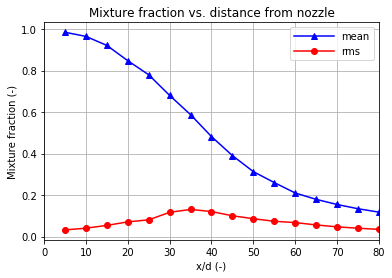

In [8]:
# plot centerline profiles of mean and rms mixture fraction
fig, ax = plt.subplots()
ax.plot(FlameD_CL['x/d'], FlameD_CL['F'],    'b^-', label='mean')
ax.plot(FlameD_CL['x/d'], FlameD_CL['Frms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,80.0),
       xlabel='x/d (-)',
       ylabel='Mixture fraction (-)',
       title ='Mixture fraction vs. distance from nozzle')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_CL_f.pdf")

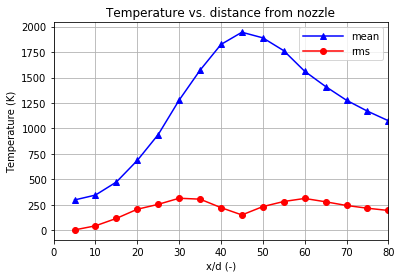

In [9]:
# plot centerline profiles of mean and rms temperature
fig, ax = plt.subplots()
ax.plot(FlameD_CL['x/d'], FlameD_CL['T(K)'], 'b^-', label='mean')
ax.plot(FlameD_CL['x/d'], FlameD_CL['Trms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,80.0),
       xlabel='x/d (-)',
       ylabel='Temperature (K)',
       title ='Temperature vs. distance from nozzle')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_CL_T.pdf")

The mean mixture fraction decays monotonically as a function of $x$, from a value of unity at the fuel-nozzle exit ($x=0$) toward zero. The mean temperature first increases, then decreases, with increasing $x$. The peak value of the mean temperature occurs close to the location where the mean mixture fraction is equal to the stoichiometric mixture-fraction value (~0.35). The maximum rms values are approximately 10% of the corresponding mean values.

Next we look at mean species mass fraction profiles:

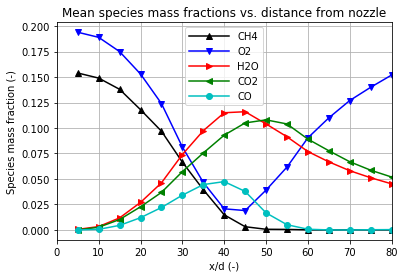

In [10]:
# plot centerline profiles of major species (plus CO) mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_CL['x/d'], FlameD_CL['YCH4'],  'k^-', label='CH4')
ax.plot(FlameD_CL['x/d'], FlameD_CL['YO2'],   'bv-', label='O2' )
ax.plot(FlameD_CL['x/d'], FlameD_CL['YH2O'],  'r>-', label='H2O')
ax.plot(FlameD_CL['x/d'], FlameD_CL['YCO2'],  'g<-', label='CO2')
ax.plot(FlameD_CL['x/d'], FlameD_CL['YCO'],   'co-', label='CO' )
ax.set(xlim=(0.0,80.0),
       xlabel='x/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. distance from nozzle')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_CL_Ymajor.pdf")

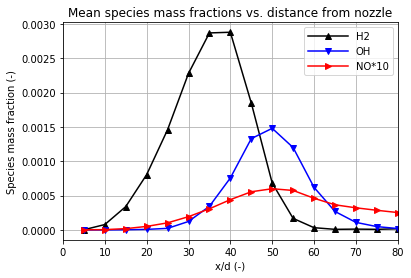

In [11]:
# plot centerline profiles of minor species mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_CL['x/d'], FlameD_CL['YH2'],     'k^-', label='H2'   )
ax.plot(FlameD_CL['x/d'], FlameD_CL['YOH'],     'bv-', label='OH'   )
ax.plot(FlameD_CL['x/d'], FlameD_CL['YNO']*10., 'r>-', label='NO*10')
ax.set(xlim=(0.0,80.0),
       xlabel='x/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. distance from nozzle')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_CL_Yminor.pdf")

The mean $CH_4$ mass fraction decays monotonically with increasing $x$, and is close to (but greater than) zero at the location where the mean mixture fraction has its stoichiometric value. The mean $O_2$ profile has a minimum at a location that is close to where the mean mixture fraction has its stoichiometric value. Recall that for this flame, there is $O_2$ both in the "fuel" jet and in the ambient air. 

The peaks in mean $CO_2$ and $H_2O$ mass fractions are close to the location where the mean mixture fraction has its stoichiometric value, with the $H_2O$ peak being upstream of the $CO_2$ peak. The peaks in the mean $CO$ and $H_2$ mass fractions (especially $H_2$) are toward the fuel-rich side (upstream of the location where the mean mixture fraction has its stoichiometric value). The peaks in the mean $OH$ and $NO$ profiles are on the fuel-lean side (downstream of the location where the mean mixture fraction has its stoichiometric value).

### 2.2 Radial profiles

Next we look at radial profiles of Favre-averaged mean quantitites at an axial distance of 30 fuel-jet-nozzle diameters from the fuel nozzle exit ($x/d$ = 30), as an example. From the above figures, it can be seen that this is upstream of the axial location at which the mean mixture fraction has its stoichiometric value along the centerline.

In [12]:
# read experimental data into a Pandas DataFrame
# the Excel file "FlameD_Yfav_30.csv" must be in subdirectory "data" under the current working directory
FlameD_30 = pd.read_csv('data/FlameD_Yfav_30.csv')

# print the first few rows of experimental data
FlameD_30.head()

,r/d,F,Frms,T(K),Trms,YO2,YO2rms,YN2,YN2rms,YH2,...,YCO,YCOrms,YCO2,YCO2rms,YOH,YOHrms,YNO,YNOrms,YCOLIF,YCOLIFrms
0,0.00,0.6817,0.1076,1262,313,0.0835,0.0395,0.688,0.0155,0.002230,...,0.0330,0.0127,0.0557,0.0205,0.000102,0.000451,0.000019,0.000012,0.0311,0.0124
1,0.42,0.6589,0.1211,1325,328,0.0763,0.0409,0.690,0.0166,0.002310,...,0.0345,0.0134,0.0601,0.0217,0.000162,0.000545,0.000021,0.000013,0.0331,0.0132
2,0.83,0.5763,0.1514,1512,339,0.0576,0.0403,0.699,0.0200,0.002370,...,0.0374,0.0173,0.0719,0.0238,0.000468,0.000953,0.000029,0.000016,0.0365,0.0152
3,1.25,0.4577,0.1692,1661,299,0.0489,0.0405,0.711,0.0220,0.001930,...,0.0329,0.0220,0.0848,0.0232,0.000949,0.001180,0.000037,0.000017,0.0332,0.0199
4,1.67,0.3071,0.1574,1630,363,0.0695,0.0567,0.728,0.0215,0.000963,...,0.0199,0.0236,0.0857,0.0273,0.001260,0.001180,0.000041,0.000018,0.0197,0.0217


The same quantities are given in this file as in the previous file, with the exception that here the different spatial locations correspond to different radial locations $r$ (normalized by the fuel-jet diameter $d$) from the centerline, all at axial location $x/d = 30$.

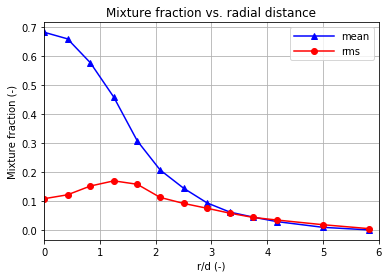

In [13]:
# plot radial profiles of mean and rms mixture fraction
fig, ax = plt.subplots()
ax.plot(FlameD_30['r/d'], FlameD_30['F'],    'b^-', label='mean')
ax.plot(FlameD_30['r/d'], FlameD_30['Frms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,6.0),
       xlabel='r/d (-)',
       ylabel='Mixture fraction (-)',
       title ='Mixture fraction vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_30_f.pdf")

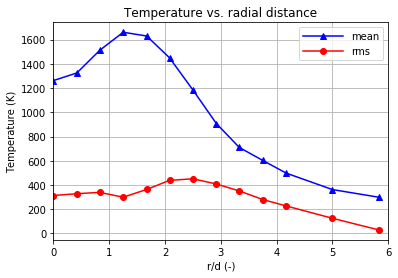

In [14]:
# plot radial profiles of mean and rms temperature
fig, ax = plt.subplots()
ax.plot(FlameD_30['r/d'], FlameD_30['T(K)'], 'b^-', label='mean')
ax.plot(FlameD_30['r/d'], FlameD_30['Trms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,6.0),
       xlabel='r/d (-)',
       ylabel='Temperature (K)',
       title ='Temperature vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_30_T.pdf")

The mean mixture fraction decays monotonically with increasing $r$, while the peak in the mean temperature profile occurs at a radial location that is close to the location where the mean mixture fraction has its stoichiometric value.

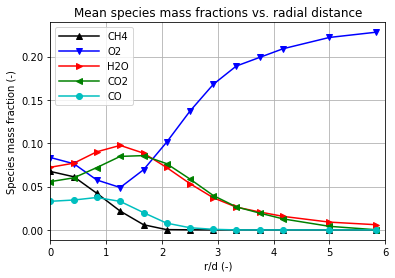

In [15]:
# plot radial profiles of major species (plus CO) mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_30['r/d'], FlameD_30['YCH4'],  'k^-', label='CH4')
ax.plot(FlameD_30['r/d'], FlameD_30['YO2'],   'bv-', label='O2' )
ax.plot(FlameD_30['r/d'], FlameD_30['YH2O'],  'r>-', label='H2O')
ax.plot(FlameD_30['r/d'], FlameD_30['YCO2'],  'g<-', label='CO2')
ax.plot(FlameD_30['r/d'], FlameD_30['YCO'],   'co-', label='CO' )
ax.set(xlim=(0.0,6.0),
       xlabel='r/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_30_Ymajor.pdf")

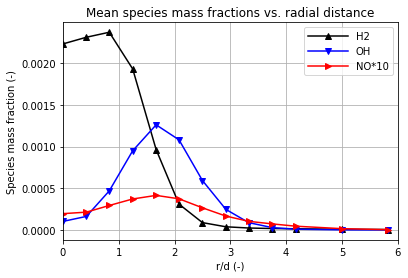

In [16]:
# plot radial profiles of minor species mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_30['r/d'], FlameD_30['YH2'],     'k^-', label='H2'   )
ax.plot(FlameD_30['r/d'], FlameD_30['YOH'],     'bv-', label='OH'   )
ax.plot(FlameD_30['r/d'], FlameD_30['YNO']*10., 'r>-', label='NO*10')
ax.set(xlim=(0.0,6.0),
       xlabel='r/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_30_Yminor.pdf")

Again, the peak values in the mean $CO_2$ and $H_2O$ profiles occur close to the location where the mean mixture fraction has its stoichiometric value, $CO$ and $H_2$ peak on the fuel-rich side, and $OH$ and $NO$ peak on the fuel-lean side.

We then repeat the exercise at axial location $x/d=60$, which is downstream of the location at which the mean mixture fraction has its stoichiometric value on the centerline:

In [17]:
# read experimental data into a Pandas DataFrame
# the Excel file "FlameD_Yfav_60.csv" must be in subdirectory "data" under the current working directory
FlameD_60 = pd.read_csv('data/FlameD_Yfav_60.csv')

# print the first few rows of experimental data
FlameD_60.head()

,r/d,F,Frms,T(K),Trms,YO2,YO2rms,YN2,YN2rms,YH2,...,YCO,YCOrms,YCO2,YCO2rms,YOH,YOHrms,YNO,YNOrms,YCOLIF,YCOLIFrms
0,0.00,0.2067,0.0638,1543,300,0.0918,0.0412,0.743,0.0110,0.000032,...,0.000740,0.00380,0.0881,0.0257,0.000617,0.000647,0.000046,0.000017,0.001020,0.00278
1,0.69,0.1998,0.0660,1503,315,0.0975,0.0427,0.743,0.0113,0.000024,...,0.000571,0.00378,0.0853,0.0271,0.000563,0.000623,0.000044,0.000017,0.000906,0.00248
2,1.39,0.1800,0.0665,1414,338,0.1090,0.0441,0.746,0.0111,0.000012,...,0.000116,0.00326,0.0778,0.0279,0.000438,0.000553,0.000040,0.000019,0.000667,0.00194
3,2.08,0.1681,0.0663,1352,341,0.1170,0.0438,0.747,0.0107,0.000015,...,0.000470,0.00287,0.0727,0.0279,0.000363,0.000516,0.000037,0.000018,0.000470,0.00148
4,2.78,0.1418,0.0641,1205,345,0.1350,0.0423,0.750,0.0104,0.000016,...,0.000103,0.00265,0.0613,0.0272,0.000209,0.000393,0.000030,0.000017,0.000246,0.00109


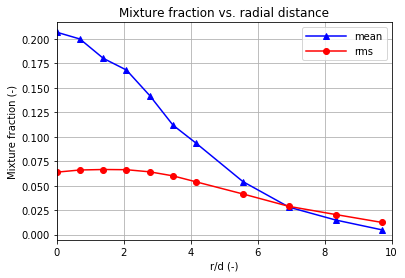

In [18]:
# plot radial profiles of mean and rms mixture fraction
fig, ax = plt.subplots()
ax.plot(FlameD_60['r/d'], FlameD_60['F'],    'b^-', label='mean')
ax.plot(FlameD_60['r/d'], FlameD_60['Frms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,10.0),
       xlabel='r/d (-)',
       ylabel='Mixture fraction (-)',
       title ='Mixture fraction vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_60_f.pdf")

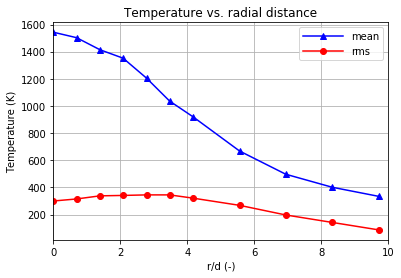

In [19]:
# plot radial profiles of mean and rms temperature
fig, ax = plt.subplots()
ax.plot(FlameD_60['r/d'], FlameD_60['T(K)'], 'b^-', label='mean')
ax.plot(FlameD_60['r/d'], FlameD_60['Trms'], 'ro-', label='rms' )
ax.set(xlim=(0.0,10.0),
       xlabel='r/d (-)',
       ylabel='Temperature (K)',
       title ='Temperature vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_60_T.pdf")

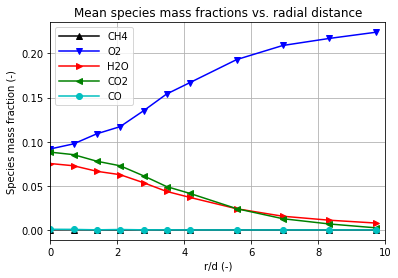

In [20]:
# plot radial profiles of major species (plus CO) mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_60['r/d'], FlameD_60['YCH4'],  'k^-', label='CH4')
ax.plot(FlameD_60['r/d'], FlameD_60['YO2'],   'bv-', label='O2' )
ax.plot(FlameD_60['r/d'], FlameD_60['YH2O'],  'r>-', label='H2O')
ax.plot(FlameD_60['r/d'], FlameD_60['YCO2'],  'g<-', label='CO2')
ax.plot(FlameD_60['r/d'], FlameD_60['YCO'],   'co-', label='CO' )
ax.set(xlim=(0.0,10.0),
       xlabel='r/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_60_Ymajor.pdf")

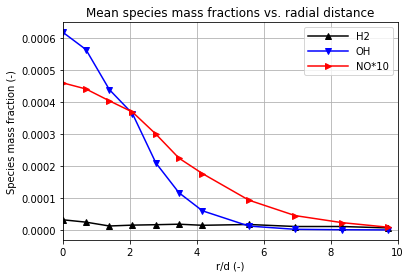

In [21]:
# plot radial profiles of minor species mean mass fractions
fig, ax = plt.subplots()
ax.plot(FlameD_60['r/d'], FlameD_60['YH2'],     'k^-', label='H2'   )
ax.plot(FlameD_60['r/d'], FlameD_60['YOH'],     'bv-', label='OH'   )
ax.plot(FlameD_60['r/d'], FlameD_60['YNO']*10., 'r>-', label='NO*10')
ax.set(xlim=(0.0,10.0),
       xlabel='r/d (-)',
       ylabel='Species mass fraction (-)',
       title ='Mean species mass fractions vs. radial distance')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_60_Yminor.pdf")

At $x/d=60$, the mixture is fuel lean (in the mean) at all radial locations. So here the radial profiles of mean quantities are all monotonic in $r$, and there is essentially no $ CH_4$, $CO$, or $H_2$.

## 3. Scatter plots

In this section, we plot and discuss some of the instantaneous measured quantitites in the turbulent flame, and explore the flame structure in mixture-fraction space (versus physical space). Specifically, we look at "scatter plots" of temperature or species mass fractions versus mixture fraction for Flame D and for Flame F, at an axial distance of 30 fuel-jet-nozzle diameters from the fuel nozzle exit ($x/d$ = 30). Here the individual experimental measurements are taken at various radial locations at the fixed axial location; the radial location of each measurement is included in the experimental data table, as can be seen below or by opening the .csv file.

In [22]:
# read experimental data into a Pandas DataFrame
# the Excel files "FlameD_scat_30.csv" and "FlameF_scat_30.csv" must be in subdirectory "data"
#   under the current working directory
FlameD_scat_30 = pd.read_csv('data/FlameD_scat_30.csv')
FlameF_scat_30 = pd.read_csv('data/FlameF_scat_30.csv')

# print the first few rows of experimental data in one of the files
FlameD_scat_30.head()

,F,T(K),YO2,YN2,YH2,YH2O,YCH4,YCO,YCO2,YOH,YNO,YCO(LIF),TDNR,r(mm)
0,0.1346,1213,0.1360,0.754,-0.000046,0.0540,0.000146,-0.000395,0.0544,0.000190,0.000020,0.000788,0.980,-6
1,0.6944,1365,0.0709,0.690,0.002470,0.0740,0.066500,0.043200,0.0610,0.000044,0.000017,0.034900,1.040,-6
2,0.5854,1585,0.0285,0.696,0.002990,0.0982,0.033100,0.049900,0.0885,0.000008,0.000026,0.052600,0.984,-6
3,0.6479,1365,0.0601,0.697,0.002260,0.0802,0.056100,0.042400,0.0621,0.000017,0.000018,0.042000,1.002,-6
4,0.6761,1092,0.1030,0.693,0.002050,0.0587,0.073700,0.025500,0.0449,0.000007,0.000012,0.024700,0.971,-6


Here each row in the file corresponds to the simultaneous and essentially instantaneous measurement of the temperature and nine species mass fractions at one location ($x/d=30$ and the given value of $r$) in the flame. The measurements at each location are repeated multiple times.

Here we will look at temperature and $NO$ mass fraction, and at key differences between Flame D and Flame F.

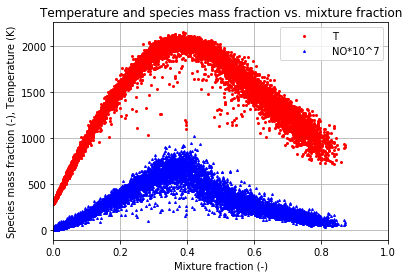

In [23]:
# plot scatter plots of temperature and NO mass fraction versus mixture fraction for Flame D
# note the use of "ms=2" to reduce the marker size from its default value, so that the individual points can be seen
#   more clearly in the scatter plot
# the NO mass fraction is multiplied by a large number, so that temperature and NO can be plotted using the same y-axis
#   scale
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['T(K)'],     'ro', ms=2, label='T'      )
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YNO']*1.e7, 'b^', ms=2, label='NO*10^7')
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-), Temperature (K)',
       title ='Temperature and species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_TNO.pdf")

At this axial location, mixture fraction values greater than approximately 0.9 are never encountered. The highest temperatures are seen for mixture fraction values that are close to the stoichiometric value (~0.35). This confirms that the flame behaves as a nonpremixed flame, and that the mixture-fraction definition is appropriate. Most of the temperature-versus-mixture-fraction points are clustered in a narrow band that is similar to the simplified state relationships discussed in Chapters 9 and 13 of Turns 4th ed. This will be explored further in Section 4 below.

These Flame D results can be compared with those for Flame F:

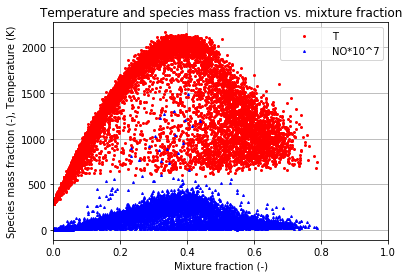

In [24]:
# repeat for Flame F
fig, ax = plt.subplots()
ax.plot(FlameF_scat_30['F'], FlameF_scat_30['T(K)'],     'ro', ms=2, label='T'      )
ax.plot(FlameF_scat_30['F'], FlameF_scat_30['YNO']*1.e7, 'b^', ms=2, label='NO*10^7')
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-), Temperature (K)',
       title ='Temperature and species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaF_scat_30_TNO.pdf")

For Flame F, there is a much wider spread of measured temperatures and $NO$ mass fractions for any fixed value of the mixture fraction. In particular, even for mixture-fraction values that are close to the stoichiometric value, the temperature is often far below what would be expected in the "fast-chemistry" limit. This is evidence of *local extinction* of the flame. Comparing the Flame D and the Flame F results, it can be seen that Flame F (the higher-Reynolds-number flame) exhibits much more local extinction compared to Flame D.

## 4. State relationships: Local equilibrium, and counterflow laminar diffusion flames

We next explore to what extent the experimental measurements are consistent with two different approximations or simplifications that are often invoked in theoretical and/or modeling studies of turbulent nonpremixed flames: local equilibrium, and "flamelets". In both cases, the fundamental assumption is that knowledge of the local instantaneous value of the mixture fraction in the turbulent flame is sufficient to deduce the local instantantous values of the temperature and species mass fractions. If this is indeed the case, it would afford a significant simplification in describing and modeling turbulent flames. Recall that, in contrast to the temperature and species mass fraction equations, the mixture fraction equation has no chemical source term. So to a first approximation, the mixture fraction field in a turbulent flame is qualitatively similar to that in nonreacting turbulent jet, with the principal difference being the variable density in the flame (see Chapters 9 and 13 of Turns 4th ed.).

### 4.1 Local equilibrium

As first approximation, it is sometimes assumed that the temperature and species mass fractions in a turbulent nonpremixed flame can be determined by assuming that they correspond to the constant-pressure adiabatic equilibrium state at the local value of the equivalence ratio, or equivalently, the mixture fraction.

The state relationships (the relationship between temperature and mixture fraction, and the relationships between species mass fractions and mixture fraction) for this scenario can be computed as follows:

In [25]:
# compute the constant-pressure adiabatic equilibrium temperature and composition corresponding to a fuel-air mixture
#   initially at a temperature of 300 K and a pressure of 1 atm, for different values of the equivalence ratio (or
#   mixture fraction)
Tamb    = 300. 
Pamb    = ct.one_atm

# define the range and number of mixture-fraction values at which to compute the equilibrium state
farray  = np.linspace(0.0,1.0,101)

# define arrays to hold the equilibrium temperatures and species mass fractions
Teq     = np.zeros(len(farray))
Yeq     = np.zeros(shape=(len(farray),gas.n_species))

# define a very large number
hugenum = 1.e10

for i, f in enumerate(farray):                      # loop over mixture-fraction values
    if f<1.:
        phi = f*( 1. - f_st ) / ( f_st*( 1. - f ) ) # compute the equivalence ratio from the mixture fraction
    else:                                           # protect against division by zero for f = 1 (phi = infinity)
        phi = hugenum
    gas.TP = Tamb,Pamb                              # set gas mixture temperature and pressure
    gas.set_equivalence_ratio(phi,fuel,air)         # set gas mixture equivalence ratio; "fuel" and "air" were defined earlier
    gas.equilibrate('HP')                           # compute the constant-pressure adiabatic equilibrium state
    Teq[i]   = gas.T                                # store the equilibrium temperature for i'th mixture fraction
    Yeq[i,:] = gas.Y                                # store the equilibrium species mass fractions for i'th mixture fraction

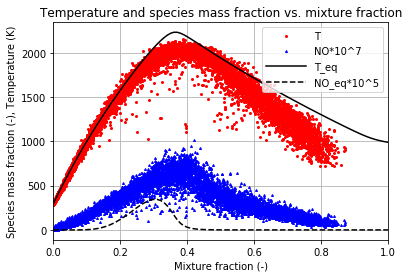

In [26]:
# plot scatter plots of temperature and NO mass fraction versus mixture fraction for Flame D at x/d=30 as before,
#   now adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['T(K)'],              'ro', ms=2, label='T'          )
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YNO']*1.e7,          'b^', ms=2, label='NO*10^7'    )
ax.plot(farray,              Teq,                                 'k-',       label='T_eq'       )
ax.plot(farray,              Yeq[:,gas.species_index('NO')]*1.e5, 'k--',      label='NO_eq*10^5' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-), Temperature (K)',
       title ='Temperature and species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_TNO.pdf")

The experimental temperature data cluster quite nicely around the local equilibrium line on the fuel-lean side. The peak measured temperatures are somewhat lower than the equilibrium temperature. The next approximation that we will consider in Section 4.2 does somewhat better in this respect. We have also neglected radiation here, and radiative heat loss would result in lower temperatures.

For very fuel-rich mixtures ($f>0.8$, say), the equilibrium calculation gives unrealistically high temperatures. That is because for this case, pure "fuel" ($f=1$) includes both $CH_4$ and $O_2$, so that the computed equilibrium temperature is much higher than the fuel-jet temperature.

The measured $NO$ mass fractions are one-to-two orders of magnitude lower than the values deduced assuming local equilibrium (note the different multipliers used for the experimental values versus the computed equilibrium values). Clearly, local equilibrium is a very poor approximation for NO.

Let's look at some of the other species:

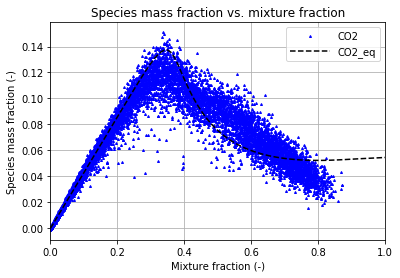

In [27]:
# plot a scatter plot of CO2 mass fraction versus mixture fraction,
#   adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YCO2'],          'b^', ms=2, label='CO2'    )
ax.plot(farray,              Yeq[:,gas.species_index('CO2')], 'k--',      label='CO2_eq' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_CO2.pdf")

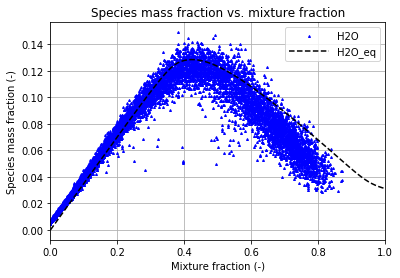

In [28]:
# plot a scatter plot of H2O mass fraction versus mixture fraction,
#   adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YH2O'],          'b^', ms=2, label='H2O'    )
ax.plot(farray,              Yeq[:,gas.species_index('H2O')], 'k--',      label='H2O_eq' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_H2O.pdf")

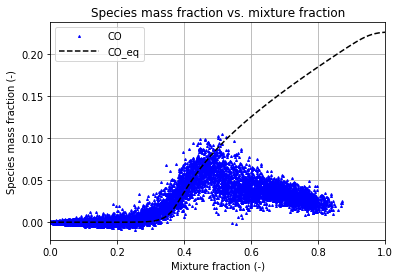

In [29]:
# plot a scatter plot of CO mass fraction versus mixture fraction,
#   adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YCO'],          'b^', ms=2, label='CO'    )
ax.plot(farray,              Yeq[:,gas.species_index('CO')], 'k--',      label='CO_eq' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_CO.pdf")

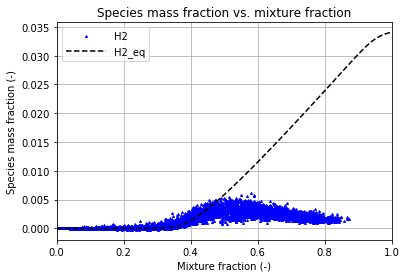

In [30]:
# plot a scatter plot of H2 mass fraction versus mixture fraction,
#   adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YH2'],          'b^', ms=2, label='H2'    )
ax.plot(farray,              Yeq[:,gas.species_index('H2')], 'k--',      label='H2_eq' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_H2.pdf")

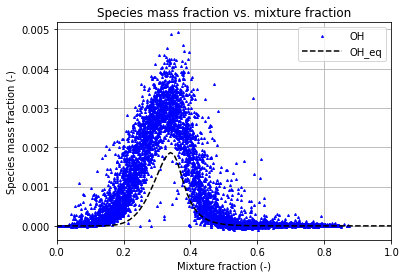

In [31]:
# plot a scatter plot of OH mass fraction versus mixture fraction,
#   adding the local equilibrium reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'], FlameD_scat_30['YOH'],          'b^', ms=2, label='OH'    )
ax.plot(farray,              Yeq[:,gas.species_index('OH')], 'k--',      label='OH_eq' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_eq_OH.pdf")

For the major product species $CO_2$ and $H_2O$, the experimental results are clustered around the local equilibrium line for fuel-lean-to-stoichiometric-to-moderately-fuel-rich (to $f \approx 0.5$) mixtures. Deviations increase for increasingly rich mixtures. The general trends are similar for $CO$ and $H_2$, although the deviations from local equilibrium are more dramatic for $ f > 0.5$. For $OH$, the experimental values are consistently higher than those deduced from local equilibrium, with the peak values differing by approximately a factor of two.

### 4.2 Counterflow laminar diffusion flames

As a next (presumably better) level of approximation, it is sometimes assumed that the relationship between temperature and mixture fraction, and the relationships between species mass fractions and mixture fraction, in a turbulent nonpremixed flame are the same as the corresponding relationships in a laminar diffusion flame: this is an example of a *flamelet* model. In this case, the state relationships are determined by performing a counterflow laminar diffusion flame calculation for a single value of the strain rate (or of the fuel and oxidizer mass flow rates).

As we saw in tutorial Notebook 9_1_Counterflow_laminar_diffusion_flame, the laminar flame structure depends on the strain rate, which is determined by the mass flow rates of the fuel and oxidizer. However, the state relationships in terms of mixture fraction are relatively weak functions of strain rate, for sufficiently low values of the strain rate. We again neglect radiative heat losses in our counterflow laminar diffusion flame calculation.

In [32]:
# perform a counterflow laminar flow diffusion flame with the current fuel (CH4/air mix) exiting from one nozzle
#   and our usual approximation for air exiting from the other nozzle

# pressure (constant and uniform)
P = ct.one_atm  # (Pa)

# fuel-nozzle exit temperature, composition, and mass flux (mass flow rate per unit area)
T_fuel    = 300.0              # (K)
X_fuel    = fuel               # species mole fractions; "fuel" was defined earlier
mdot_fuel = 0.05               # (kg/m^2-s)

# oxidizer-nozzle exit temperature, composition, and mass flux (mass flow rate per unit area)
T_oxid    = 300.0              # (K)
X_oxid    = air                # species mole fractions; "air" was defined earlier
mdot_oxid = 0.05               # (kg/m^2-s)

# distance between the fuel- and oxidizer-nozzle exit planes
width     = 0.02 # (m)

# create the flame object by filling the computational domain with the desired gas mixture
flame = ct.CounterflowDiffusionFlame(gas, width=width)

# set the boundary conditions
flame.fuel_inlet.T        = T_fuel
flame.fuel_inlet.X        = X_fuel
flame.fuel_inlet.mdot     = mdot_fuel

flame.oxidizer_inlet.T    = T_oxid
flame.oxidizer_inlet.X    = X_oxid
flame.oxidizer_inlet.mdot = mdot_oxid

# disable radiation
flame.set_boundary_emissivities(0.0, 0.0)
flame.radiation_enabled = False

# specify numerical parameters that control local grid refinement
flame.set_refine_criteria(ratio=4, slope=0.2, curve=0.3, prune=0.04)

# specify the level of output desired
loglevel = 1

# for "auto=True", the code will sequentially execute the default solution stages, and will attempt to recover from any
#   errors that are encountered

ctim0 = time.time()

# solve for the steady-state flame structure
flame.solve(loglevel=loglevel, auto=True)

ctim1 = time.time()
ctime = ctim1 - ctim0

# print the computer time required
print(" ")
print("Solution required {:.2f} s".format(ctime))


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05      5.001
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001216      4.713
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0009237      4.737
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01052       3.78
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1798     0.9358
Attempt Newton solution of steady-state problem...    success.

Problem solved on [6] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

.................

In [33]:
# report the strain rate (1/s)
# you can decrease/increase the strain rate by decreasing/increasing the fuel and oxidizer mass flow rates,
#   and see how that changes the results
flame.strain_rate('max')

30.65780258922757

Before comparing with experimental data, let's compare the two different state relationships:

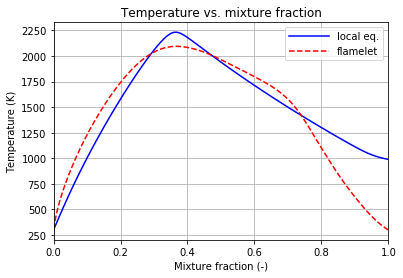

In [34]:
# plot temperature versus mixture fraction for local equilibrium and for a counterflow laminar diffusion flame
fig, ax = plt.subplots()
ax.plot(farray,                      Teq,     'b-',  label='local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.T, 'r--', label='flamelet'  )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Temperature (K)',
       title ='Temperature vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("state_relations_T.pdf")

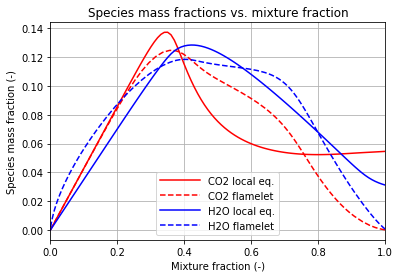

In [35]:
# plot CO2 and H2O versus mixture fraction for local equilibrium and for a counterflow laminar diffusion flame
fig, ax = plt.subplots()
ax.plot(farray,                      Yeq[:,gas.species_index('CO2')],   'r-',  label='CO2 local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('CO2')], 'r--', label='CO2 flamelet'  )
ax.plot(farray,                      Yeq[:,gas.species_index('H2O')],   'b-',  label='H2O local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('H2O')], 'b--', label='H2O flamelet'  )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fractions vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("state_relations_CO2-H2O.pdf")

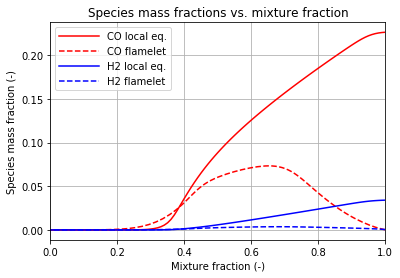

In [36]:
# plot CO and H2 versus mixture fraction for local equilibrium and for a counterflow laminar diffusion flame
fig, ax = plt.subplots()
ax.plot(farray,                      Yeq[:,gas.species_index('CO')],   'r-',  label='CO local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('CO')], 'r--', label='CO flamelet'  )
ax.plot(farray,                      Yeq[:,gas.species_index('H2')],   'b-',  label='H2 local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('H2')], 'b--', label='H2 flamelet'  )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fractions vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("state_relations_CO-H2.pdf")

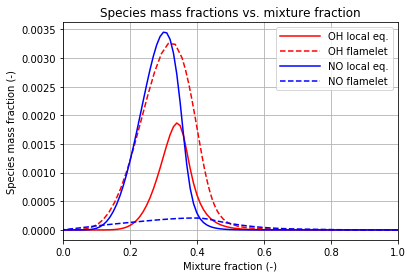

In [37]:
# plot OH and NO versus mixture fraction for local equilibrium and for a counterflow laminar diffusion flame
fig, ax = plt.subplots()
ax.plot(farray,                      Yeq[:,gas.species_index('OH')],   'r-',  label='OH local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('OH')], 'r--', label='OH flamelet'  )
ax.plot(farray,                      Yeq[:,gas.species_index('NO')],   'b-',  label='NO local eq.' )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('NO')], 'b--', label='NO flamelet'  )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fractions vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("state_relations_OH-NO.pdf")

With the exceptions of $OH$ and $NO$, the local equilibrium and the counterflow laminar diffusion flame ("flamelet") results are similar for fuel-lean-to-stoichiometric mixtures. The flamelet $OH$ levels are consistently higher than the equilibrium $OH$ levels, and the local equilibrium $NO$ levels are at least an order of magnitude higher than the flamelet $NO$ levels.

Now let's redo the scatter plots, this time comparing experimental data with the flamelet reference case:

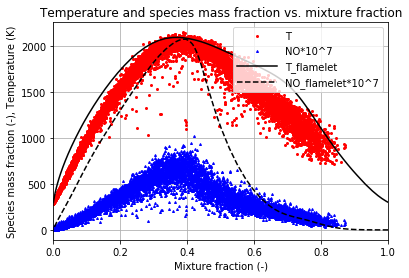

In [38]:
# plot scatter plots of temperature and NO mass fraction versus mixture fraction for Flame D at x/d=30 as before,
#   now adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['T(K)'],                'ro', ms=2, label='T'                )
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YNO']*1.e7,            'b^', ms=2, label='NO*10^7'          )
ax.plot(flame.mixture_fraction('C'), flame.T,                               'k-',       label='T_flamelet'       )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('NO')]*1.e7, 'k--',      label='NO_flamelet*10^7' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-), Temperature (K)',
       title ='Temperature and species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_TNO.pdf")

The peak temperatures from the flamelet model are closer to experimental values compared to those from the local equilibrium model, and the flamelet model does somewhat better on the fuel-rich side. However, on the fuel-lean side, the local equilibrium temperatures were closer to experiment.

The flamelet $NO$ values are in much better agreement with experiment than the local equilibrium $NO$ values; note that the same multiplier has been used here for the experimental data and for the computed flamelet values. The flamelet values are approximately twice as high as the experimental values, compared to approximately two-orders-of-magnitude difference for local equilibrium.

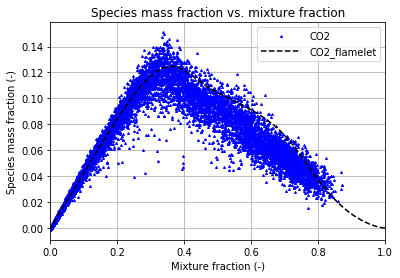

In [39]:
# plot a scatter plot of CO2 mass fraction versus mixture fraction,
#   adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YCO2'],            'b^', ms=2, label='CO2'          )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('CO2')], 'k--',      label='CO2_flamelet' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_CO2.pdf")

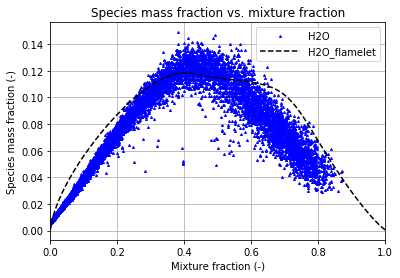

In [40]:
# plot a scatter plot of H2O mass fraction versus mixture fraction,
#   adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YH2O'],            'b^', ms=2, label='H2O'          )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('H2O')], 'k--',      label='H2O_flamelet' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_H2O.pdf")

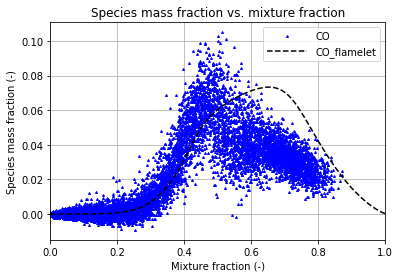

In [41]:
# plot a scatter plot of CO mass fraction versus mixture fraction,
#   adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YCO'],            'b^', ms=2, label='CO'          )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('CO')], 'k--',      label='CO_flamelet' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_CO.pdf")

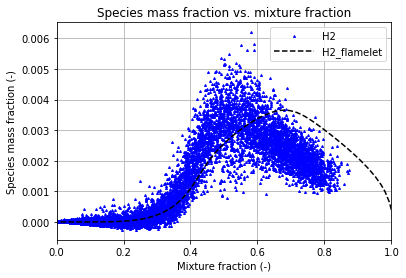

In [42]:
# plot a scatter plot of H2 mass fraction versus mixture fraction,
#   adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YH2'],            'b^', ms=2, label='H2'          )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('H2')], 'k--',      label='H2_flamelet' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_H2.pdf")

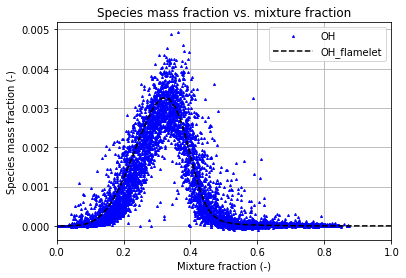

In [43]:
# plot a scatter plot of OH mass fraction versus mixture fraction,
#   adding the flamelet reference case
fig, ax = plt.subplots()
ax.plot(FlameD_scat_30['F'],         FlameD_scat_30['YOH'],            'b^', ms=2, label='OH'          )
ax.plot(flame.mixture_fraction('C'), flame.Y[gas.species_index('OH')], 'k--',      label='OH_flamelet' )
ax.set(xlim=(0.0,1.0),
       xlabel='Mixture fraction (-)',
       ylabel='Species mass fraction (-)',
       title ='Species mass fraction vs. mixture fraction')
ax.legend(handlelength=4,loc='best')
ax.grid(True)
fig.savefig("SandiaD_scat_30_flamelet_OH.pdf")

The flamelet results are generally better than the local equilibrium results, especially on the fuel-rich side and for minor species.

You can experiment with different strain rates (fuel and oxidizer mass flow rates) to see how the results change. In general, for values of the strain rate that are far below the extinction strain rate (see tutorial Notebook 9_2_1DCLDF_extinction), the flame structure in mixture-fraction space depends only weakly on the strain rate.

## 5. Implications for turbulent nonpremixed combustion modeling

The results in Section 4 above provide some insight into how a CFD-based turbulent combustion model might be constructed. The mixture fraction is the single most important quantity, so a first step would be to accurately compute the mixture fraction and its statistical properties (e.g., mean and variance, or probability density function - PDF). From there, one can use appropriate state relationships to map temperature and species mass fractions to mixture fraction. In order of increasing accuracy for specifying the state relationships are: the fast-chemisty limit (see tutorial Notebook 9_1_Counterflow_laminar_diffusion_flame); local equilibrium (Section 4.1 above); and a counterflow-laminar-diffusion-flame-based flamelet (Section 4.2 above). 

A logical next higher level of description might include a second independent variable in addition to a mixture fraction: for example, strain rate or scalar dissipation rate. There are also alternative approaches that are not explicitly based on mixture fraction. The interested reader is referred to the literature on turbulent combustion modeling: for example, Poinsot and Veynante, "Theoretical and Numerical Combustion", 3rd Edition (2012).